In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 4.8 MB/s 


#Dataset 1: FB.csv

In [ ]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [ ]:
fb = pd.read_csv('/content/drive/MyDrive/Time Series Analysis/FB.csv',parse_dates= True)
fb.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,1,0,0,0,0,0,0,1,0
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,0,0,1,1,1,1,1,0,1,0


In [ ]:
returns = 100*fb.Close.pct_change().dropna()

Text(0.5, 1.0, 'FB Returns')

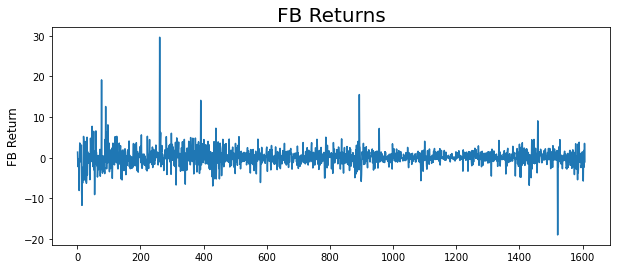

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('FB Return',fontsize=12)
plt.title('FB Returns',fontsize=20)

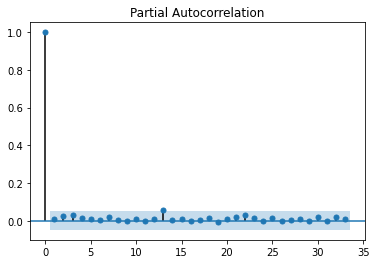

In [ ]:
plot_pacf(returns**2)
plt.show()

Our model does not have any volatilty hence, the above plot shows no PACF value above the threshold. Ideally, for our GARCH model we would take p=0 and q=0.

In [ ]:
model = arch_model(returns,p=1,q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2280798093.762812
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5916.101906792141
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8772.225001506715
Iteration:      4,   Func. Count:     30,   Neg. LLF: 3500.364497371621
Iteration:      5,   Func. Count:     35,   Neg. LLF: 3599.98239917308
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4186.1545404445715
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3473.4314460835963
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3472.991192251387
Iteration:      9,   Func. Count:     60,   Neg. LLF: 3468.0846110439156
Iteration:     10,   Func. Count:     66,   Neg. LLF: 3467.215417193077
Iteration:     11,   Func. Count:     71,   Neg. LLF: 3467.2143032322438
Iteration:     12,   Func. Count:     76,   Neg. LLF: 3467.2124826590143
Iteration:     13,   Func. Count:     81,   Neg. LLF: 3467.2124626957875
Iteration:     14,   Func. Count:     86,   Neg. LLF: 3467.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3467.21
Distribution:                  Normal   AIC:                           6942.42
Method:            Maximum Likelihood   BIC:                           6963.95
                                        No. Observations:                 1607
Date:                Fri, Dec 02 2022   Df Residuals:                     1606
Time:                        14:26:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1144  4.959e-02      2.308  2.102e-02 [1.724e-02,  0.212]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0104  6.592e-03      1.578      0.115 [-2.518e-03,2.332e-02]
alpha[1]   7.1694e-03  7.680e-03      0.933      0.351 [-7.884e-03,2.222e-02]
beta[1]        0.9897  7.755e-03    127.610      0.000      [  0.974,  1.005]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_pred = []
test_size=365
for i in range(test_size):
  train = returns[:-(test_size-i)]
  model = arch_model(train,p=1,q=0)
  model_fit = model.fit(disp='off')
  pred = model_fit.forecast(horizon=1)
  rolling_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [ ]:
rolling_pred = pd.Series(rolling_pred,index = returns.index[-365:])

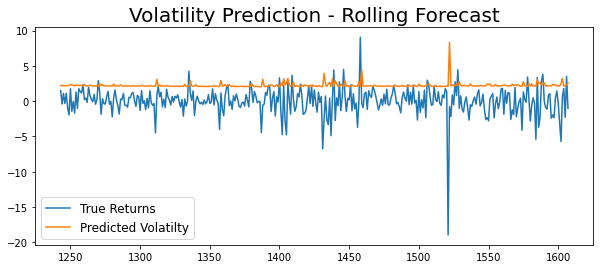

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_pred)
plt.title("Volatility Prediction - Rolling Forecast",fontsize = 20)
plt.legend(['True Returns','Predicted Volatilty'],fontsize=12,loc='lower left')

#Dataset 2: Milk Production

In [ ]:
mp = pd.read_csv('/content/drive/MyDrive/Time Series Analysis/monthly-milk-production-pounds.csv',parse_dates= True)
mp.head()

,Month,Monthly milk production: pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
mp.dropna(inplace=True)
mp.rename(columns={"Monthly milk production: pounds per cow": "Monthly_Prod"},inplace=True)
mp.head()

,Month,Monthly_Prod
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
returns = 100*mp.Monthly_Prod.pct_change().dropna()

Text(0.5, 1.0, 'Milk Production')

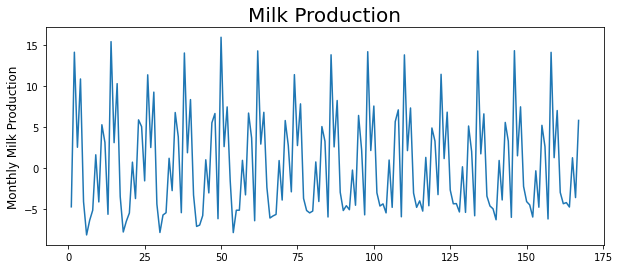

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Monthly Milk Production',fontsize=12)
plt.title('Milk Production',fontsize=20)

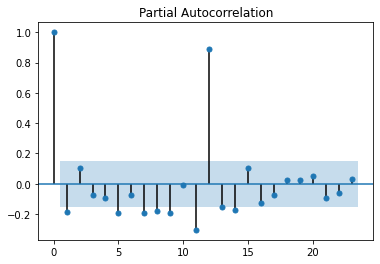

In [ ]:
plot_pacf(returns**2)
plt.show()

Our model does not have any volatilty hence, the above plot shows no PACF value above the threshold. Ideally, for our GARCH model we would take p=0 and q=0.

In [ ]:
model = arch_model(returns,p=1,q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 582.1624222737183
Iteration:      2,   Func. Count:     10,   Neg. LLF: 566.6543698618798
Iteration:      3,   Func. Count:     15,   Neg. LLF: 550.4113264661963
Iteration:      4,   Func. Count:     19,   Neg. LLF: 546.693292835594
Iteration:      5,   Func. Count:     23,   Neg. LLF: 542.4826752225249
Iteration:      6,   Func. Count:     27,   Neg. LLF: 541.5701207810425
Iteration:      7,   Func. Count:     31,   Neg. LLF: 541.3730182222473
Iteration:      8,   Func. Count:     35,   Neg. LLF: 541.3590012229133
Iteration:      9,   Func. Count:     39,   Neg. LLF: 541.358666128976
Iteration:     10,   Func. Count:     43,   Neg. LLF: 541.3586578832526
Iteration:     11,   Func. Count:     47,   Neg. LLF: 541.3586572227132
Optimization terminated successfully    (Exit mode 0)
            Current function value: 541.3586572227132
            Iterations: 11
            Function evaluations: 47
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:           Monthly_Prod   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -541.359
Distribution:                  Normal   AIC:                           1088.72
Method:            Maximum Likelihood   BIC:                           1098.07
                                        No. Observations:                  167
Date:                Fri, Dec 02 2022   Df Residuals:                      166
Time:                        14:45:55   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4006      0.379      1.056      0.291 [ -0.343,  1.144]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         38.3008      5.126      7.472  7.905e-14 [ 28.254, 48.348]
alpha[1]   8.8096e-15      0.100  8.773e-14      1.000 [ -0.197,  0.197]
========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_pred = []
test_size=365
for i in range(test_size):
  train = returns[:-(test_size-i)]
  model = arch_model(train,p=1,q=0)
  model_fit = model.fit(disp='off')
  pred = model_fit.forecast(horizon=1)
  rolling_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_pred = pd.Series(rolling_pred,index = returns.index[-365:])

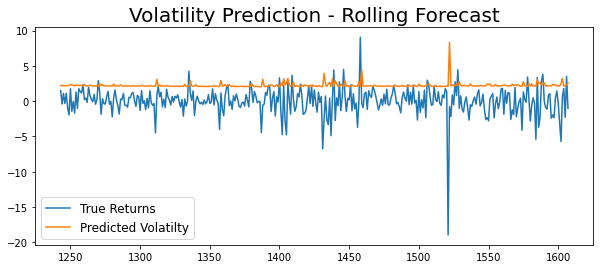

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_pred)
plt.title("Volatility Prediction - Rolling Forecast",fontsize = 20)
plt.legend(['True Returns','Predicted Volatilty'],fontsize=12,loc='lower left')